In [1]:
!pwd
!ls

/Users/svenjalueg/Analytical Tools and the Study of the Bible Code
<L_JD.xlsx
<l_jd.csv
Assignment 07 Text-Fabric Svenja Lueg.ipynb
BJD Excel.xlsx
BJD extended.xlsx
Distribution <LJD.ipynb
Distribution BJD.ipynb
Distribution BKP.ipynb
TF1.ipynb
bjd.csv
~$<L_JD.xlsx
~$BJD Excel.xlsx
~$BJD extended.xlsx


In [2]:
import sys, collections, os
import pprint as pp
import pandas as pd
import numpy as np
from enum import Enum, IntEnum
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tf.app import use

A = use('ETCBC/bhsa:hot', hoist=globals())

**Locating corpus resources ...**

rate limit is 60 requests per hour, with 60 left for this hour
To increase the rate,see https://annotation.github.io/text-fabric/tf/advanced/repo.html#github
	connecting to online GitHub repo ETCBC/bhsa ... connected


Name,# of nodes,# slots/node,% coverage
book,39,10938.21,100
chapter,929,459.19,100
lex,9230,46.22,100
verse,23213,18.38,100
half_verse,45179,9.44,100
sentence,63717,6.70,100
sentence_atom,64514,6.61,100
clause,88131,4.84,100
clause_atom,90704,4.70,100
phrase,253203,1.68,100


In [5]:
bkp_dict = {}

for w in F.otype.s('word'):
    if F.lex.v(w) == 'KP/' and F.lex.v(w-1) == 'B':
        
        bo, ch, ve = T.sectionFromNode(w)
        
        sentence = L.u(w, 'sentence')[0]
        sentence_hebr = T.text(sentence, ftm="text-trans-plain")
        sentence_tl = T.text(sentence, fmt="text-trans-plain")
        
        clause = L.u(w, 'clause')[0]
        clause_hebr = T.text(clause, ftm="text-trans-plain")
        clause_tl = T.text(clause, fmt="text-trans-plain")
        
        phrase = L.u(w, 'phrase')[0]
        function = F.function.v(phrase)
        subj = 'NA'
        objc = 'NA'
        verb = 'nominal clause'
        tense = 'NA'
        stem = 'NA'
        predicate_type = 'NA'
        
        #checking potential modifications for bjd:
        #(1)pronominal suffix,
        #(2) noun or noun phrase in the absolute state following bjd in the absolute state, or
        #(3) adjective or modifying participle
        
        modifier_bkp = 'NA'
        ps = F.prs_ps.v(w)
        nu = F.prs_nu.v(w)
        gn = F.prs_gn.v(w)
                        
        if ps in {'NA', 'unknown'}:
            ps = ''
        if nu in {'NA', 'unknown'}:
            nu = ''
        if gn in {'NA', 'unknown'}:
            gn = ''
        modifier_bkp = ps+nu+gn
        
        if modifier_bkp == '':
            modifier_bkp = 'NA'
            if F.st.v(w) == 'c' and F.st.v(w+1) == 'a':
                modifier_bkp = T.text((w+1), fmt="text-trans-plain")
            elif F.st.v(w) == 'c':
                modifier_bkp = T.text(phrase, fmt="text-trans-plain")
            elif F.sp.v(w+1) == 'adjv':
                modifier_bkp = T.text((w+1), fmt="text-trans-plain")
            elif F.vt.v(w+1) in {'ptca', 'ptcp'}:
                modifier_bkp = T.text((w+1), fmt="text-trans-plain")
        
        phrases = L.d(clause, 'phrase')
       
        for phr in phrases:
            if F.function.v(phr) in {'Pred', 'PreC'}:
                words = L.d(phr, 'word')
                for word in words:
                    if F.sp.v(word) == 'verb':
                        verb = F.lex.v(word)
                        tense = F.vt.v(word)
                        stem = F.vs.v(word)
                predicate_type = F.function.v(phr)
            elif F.function.v(phr) == 'PreO':
                words = L.d(phr, 'word')
                for word in words:
                    if F.sp.v(word) == 'verb':
                        verb = F.lex.v(word)
                        tense = F.vt.v(word)
                        stem = F.vs.v(word)
                        
                        ps = F.prs_ps.v(word)
                        nu = F.prs_nu.v(word)
                        gn = F.prs_gn.v(word)
                        
                        if ps in {'NA', 'unknown'}:
                            ps = ''
                        if nu in {'NA', 'unknown'}:
                            nu = ''
                        if gn in {'NA', 'unknown'}:
                            gn = ''
                        objc = ps+nu+gn
                        if objc == '':
                            objc = 'NA'
                            
                predicate_type = F.function.v(phr)
            elif F.function.v(phr) == 'PreS':
                words = L.d(phr, 'word')
                for word in words:
                    if F.sp.v(word) == 'verb':
                        verb = F.lex.v(word)
                        tense = F.vt.v(word)
                        stem = F.vs.v(word)
                        subj = F.prs.v(word)
                predicate_type = F.function.v(phr)
            elif F.function.v(phr) == 'Objc':
                objc = T.text(phr, fmt="text-trans-plain")
            elif F.function.v(phr) == 'Subj':
                subj = T.text(phr, fmt="text-trans-plain")
            else:
                continue
        
        if subj == 'NA':
            for phr in phrases:
                if F.function.v(phr) in {'Pred', 'PreC', 'PreO', 'PreS'}:
                    if F.function.v(phr) == 'PreS':
                        words = L.d(phr, 'word')
                        for word in words:
                            if F.sp.v(word) == 'verb':
                                ps = F.prs_ps.v(word)
                                nu = F.prs_nu.v(word)
                                gn = F.prs_gn.v(word)
                    else:
                        words = L.d(phr, 'word')
                        for word in words:
                            if F.sp.v(word) == 'verb':
                                ps = F.ps.v(word)
                                nu = F.nu.v(word)
                                gn = F.gn.v(word)
                
                    if ps in {'NA', 'unknown'}:
                        ps = ''
                    if nu in {'NA', 'unknown'}:
                        nu = ''
                    if gn in {'NA', 'unknown'}:
                        gn = ''
                    subj = ps+nu+gn
                    if subj == '':
                        subj = 'NA'
                else:
                    continue
        
        info = [w, bo, ch, ve,
                sentence_hebr, sentence_tl, clause_hebr, clause_tl,
                verb, tense, stem, predicate_type,
                function, subj, objc, modifier_bkp
               ]
        
        bkp_dict[w] = info

In [6]:
header = [
    'slot', 'book', 'chapter', 'verse',
    'sentence_hebr', 'sentence_tl', 'clause_hebr', 'clause_tl',
    'verb', 'tense', 'stem', 'predicate_type',
    'function_bjd', 'subject', 'object', 'modifier_bkp'
]

bkp_df = pd.DataFrame(bkp_dict).T
bkp_df.columns = header
print(bkp_df.shape)
print(bkp_df.head(10))

(25, 16)
          slot      book chapter verse   
17946    17946   Genesis      32    26  \
18070    18070   Genesis      32    33   
30239    30239    Exodus       4     4   
130711  130711    Judges       6    13   
135448  135448    Judges      12     3   
152931  152931  1_Samuel      19     5   
159025  159025  1_Samuel      28    21   
171444  171444  2_Samuel      18    14   
207007  207007   2_Kings      18    21   
207912  207912   2_Kings      19    24   

                                            sentence_hebr   
17946                         וַיִּגַּ֖ע בְּכַף־יְרֵכֹ֑ו   \
18070   כִּ֤י נָגַע֙ בְּכַף־יֶ֣רֶךְ יַעֲקֹ֔ב בְּגִ֖יד ...   
30239                     וַיְהִ֥י לְמַטֶּ֖ה בְּכַפֹּֽו׃    
130711                  וַֽיִּתְּנֵ֖נוּ בְּכַף־מִדְיָֽן׃    
135448                  וָאָשִׂ֨ימָה נַפְשִׁ֤י בְכַפִּי֙    
152931                וַיָּשֶׂם֩ אֶת־נַפְשֹׁ֨ו בְכַפֹּ֜ו    
159025                   וָאָשִׂ֤ים נַפְשִׁי֙ בְּכַפִּ֔י    
171444       וַיִּקַּח֩ שְׁלֹשָׁ֨ה שְׁבָ

In [7]:
bkp_df.to_csv("bkp.csv", sep="\t", index=False)

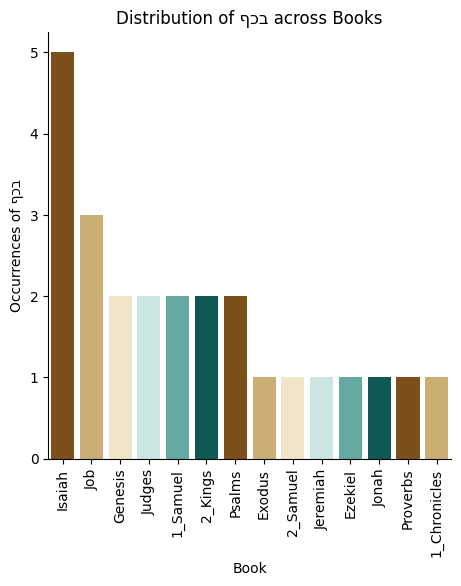

In [10]:
colors = ['#8c510a', '#d8b365', '#f6e8c3', '#c7eae5', '#5ab4ac', '#01665e']

g = sns.catplot(
    data=bkp_df,
    x='book',
    y=None,
    kind = 'count',
    palette=colors,
    order = bkp_df['book'].value_counts().index
)

g.set_xticklabels(rotation = 90)
g.set(xlabel='Book', ylabel='Occurrences of ףכב', title = 'Distribution of ףכב across Books')

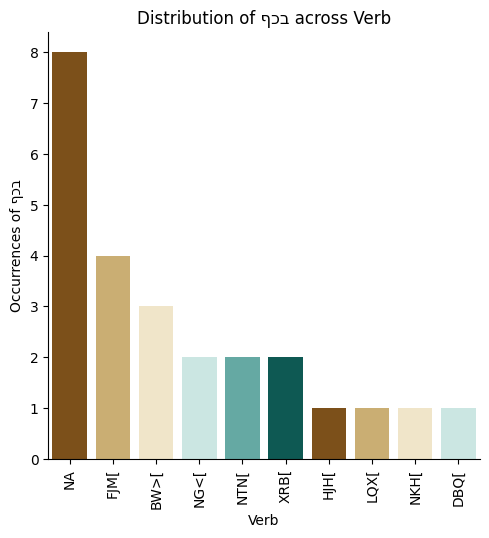

In [11]:
colors = ['#8c510a', '#d8b365', '#f6e8c3', '#c7eae5', '#5ab4ac', '#01665e']

g = sns.catplot(
    data=bkp_df,
    x='verb',
    y=None,
    kind = 'count',
    palette=colors,
    order = bkp_df['verb'].value_counts().iloc[:10].index
)

g.set_xticklabels(rotation = 90)
g.set(xlabel='Verb', ylabel='Occurrences of ףכב', title = 'Distribution of ףכב across Verb')

In [12]:
number_of_occurrences = {}

for verb in bkp_df['verb']:
    count = bkp_df['verb'].value_counts()[verb]
    number_of_occurrences[verb] = count

number_of_occurrences = dict(sorted(number_of_occurrences.items(), key=lambda item: item[1]))
number_of_occurrences

{'HJH[': 1,
 'LQX[': 1,
 'NKH[': 1,
 'DBQ[': 1,
 'NG<[': 2,
 'NTN[': 2,
 'XRB[': 2,
 'BW>[': 3,
 'FJM[': 4,
 'NA': 8}